## **Upload Dataset into Google Colab**



In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/diabetic_data2.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,Caucasian,Female,[0-10),?,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,149190,55629189,Caucasian,Female,[10-20),?,3,?,?,59,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,?,?,11,...,No,No,No,No,No,No,No,No,No,Yes
3,500364,82442376,Caucasian,Male,[30-40),?,2,?,?,44,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,16680,42519267,Caucasian,Male,[40-50),?,1,?,?,51,...,No,No,Steady,No,No,No,No,No,Ch,Yes


## **1.Preprocess the dataset**

### **a) Find and handling missing values**

**Find missing values**

In [ ]:
df = df.replace(['None','?'], pd.NA)  # Replace '?' with NaN values

In [ ]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         1341
gender                          0
age                             0
weight                      68461
time_in_hospital                0
payer_code                  25689
medical_specialty           34907
num_lab_procedures              0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
A1Cresult                   59343
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide    

In [ ]:
df.isnull().sum().sort_values(ascending=False)/len(df)

weight                      0.968345
A1Cresult                   0.839375
medical_specialty           0.493741
payer_code                  0.363357
race                        0.018968
encounter_id                0.000000
citoglipton                 0.000000
rosiglitazone               0.000000
acarbose                    0.000000
miglitol                    0.000000
troglitazone                0.000000
tolazamide                  0.000000
examide                     0.000000
glyburide-metformin         0.000000
insulin                     0.000000
tolbutamide                 0.000000
glipizide-metformin         0.000000
glimepiride-pioglitazone    0.000000
metformin-rosiglitazone     0.000000
metformin-pioglitazone      0.000000
change                      0.000000
pioglitazone                0.000000
acetohexamide               0.000000
glyburide                   0.000000
number_emergency            0.000000
gender                      0.000000
age                         0.000000
t

**Handling missing values**

In [ ]:
#Drop 'weight' column
df = df.drop('weight', axis='columns')

In [ ]:
# Impute missing values in medical_spectalty with the mode of the column
df['medical_specialty'].fillna(df['medical_specialty'].mode()[0], inplace=True)

In [ ]:
# Impute missing values in payer_code with the mode of the column
df['payer_code'].fillna(df['payer_code'].mode()[0], inplace=True)

In [ ]:
# Impute missing values in race with the mode of the column
df['race'].fillna(df['race'].mode()[0], inplace=True)

In [ ]:
# Impute missing values in A1Cresult with the mode of the column
df['A1Cresult'].fillna(df['A1Cresult'].mode()[0], inplace=True)

**Now we check if there is any missing values in Dataset and we see all missing values are removed**

In [ ]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-

### **b) Drop duplicate rows**

In [ ]:
# Drop any duplicate rows, if present
df.drop_duplicates(inplace=True)

In [ ]:
df_before_encoding = df.copy()

### **d) Encode Categorical variables to numeric**

In [ ]:
#Encode categorical variables as numeric using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2278392,8222157,2,0,0,1,7,37,41,1,...,0,0,1,1,0,0,0,0,1,0
1,149190,55629189,2,0,1,3,7,18,59,18,...,0,0,3,1,0,0,0,0,0,1
2,64410,86047875,0,0,2,2,7,18,11,13,...,0,0,1,1,0,0,0,0,1,1
3,500364,82442376,2,1,3,2,7,18,44,16,...,0,0,3,1,0,0,0,0,0,1
4,16680,42519267,2,1,4,1,7,18,51,8,...,0,0,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70694,359023502,69348060,2,0,8,8,7,18,30,4,...,0,0,1,1,0,0,0,0,1,0
70695,359031182,138393770,2,1,6,1,8,11,3,20,...,0,0,1,1,0,0,0,0,1,1
70696,359033690,90980892,0,0,8,2,7,8,58,11,...,0,0,1,1,0,0,0,0,0,1
70697,359033762,92477070,2,1,5,4,14,8,61,24,...,0,0,2,1,0,0,0,0,0,1


### **e) Standardize numerical features**

In [ ]:
# Standardize numerical features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,-2.029877,-1.316267,0.408655,-0.927816,-3.849674,-1.136153,-0.020975,1.412343,-0.079469,-1.842179,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,-1.827646
1,-2.056796,-0.005734,0.408655,-0.927816,-3.219613,-0.465449,-0.020975,-0.131028,0.833428,0.230890,...,0.0,0.0,1.878022,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
2,-2.057868,0.835167,-1.915122,-0.927816,-2.589552,-0.800801,-0.020975,-0.131028,-1.600964,-0.378836,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,0.547152
3,-2.052356,0.735496,0.408655,1.077677,-1.959491,-0.800801,-0.020975,-0.131028,0.072681,-0.013000,...,0.0,0.0,1.878022,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
4,-2.058471,-0.368149,0.408655,1.077677,-1.329430,-1.136153,-0.020975,-0.131028,0.427696,-0.988562,...,0.0,0.0,0.697764,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152


## **2. Better familiarity with the characteristics and their values using diagrams**

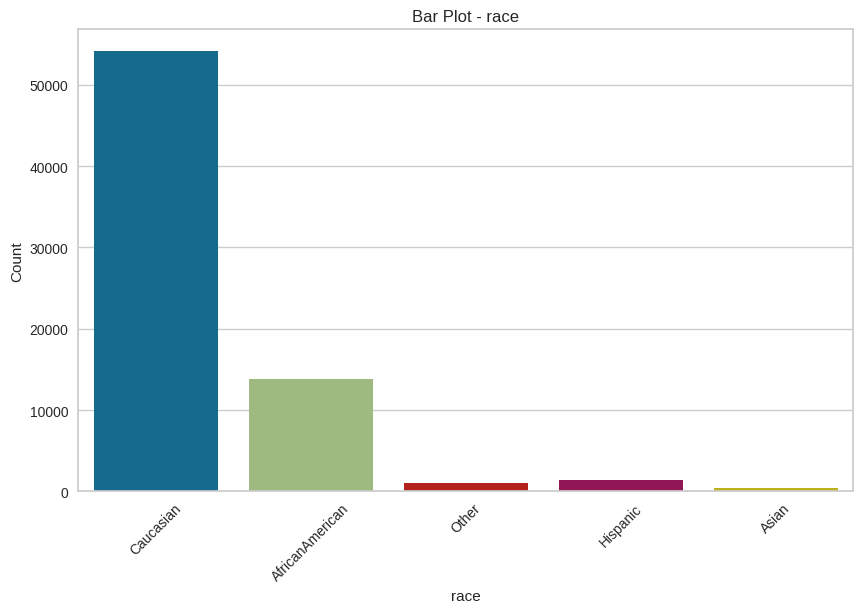

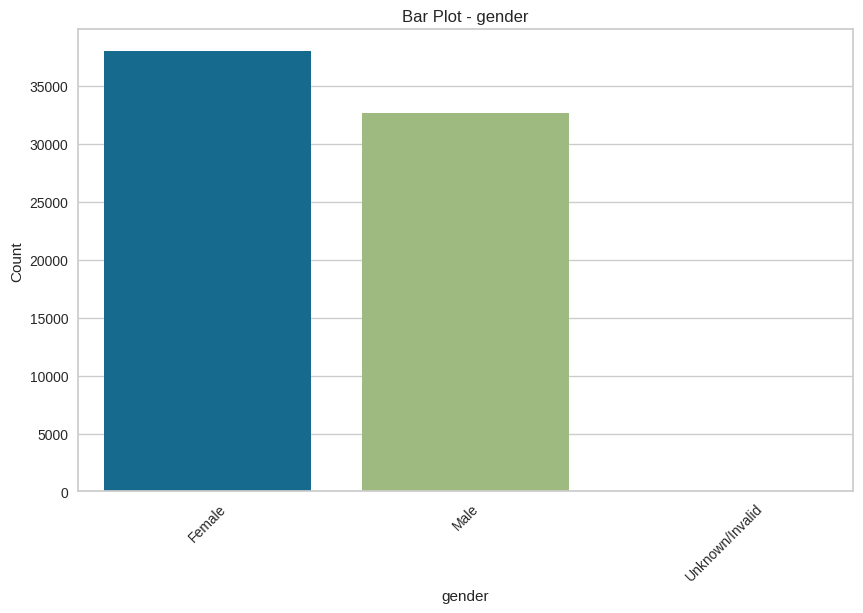

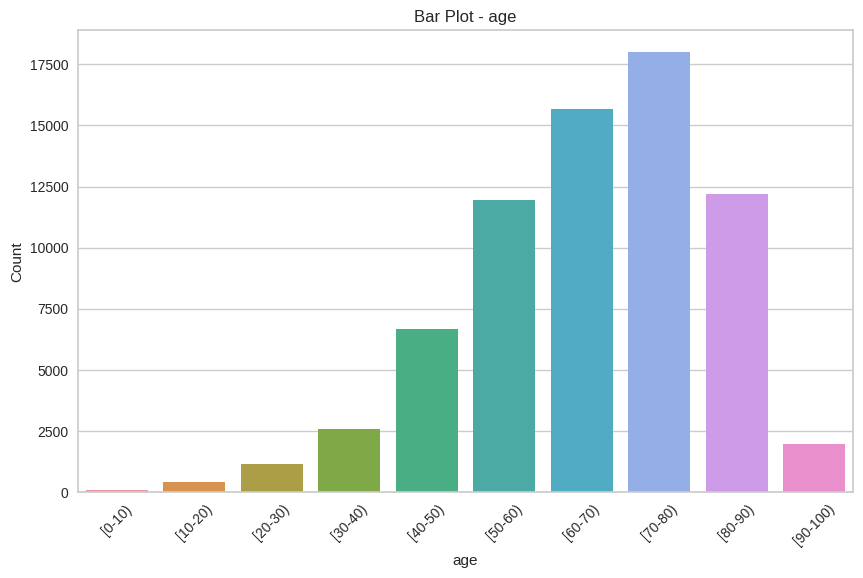

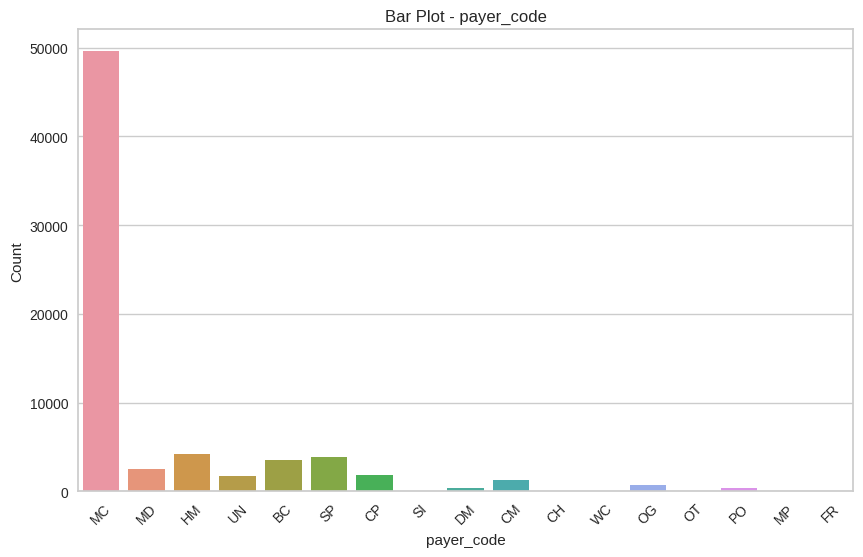

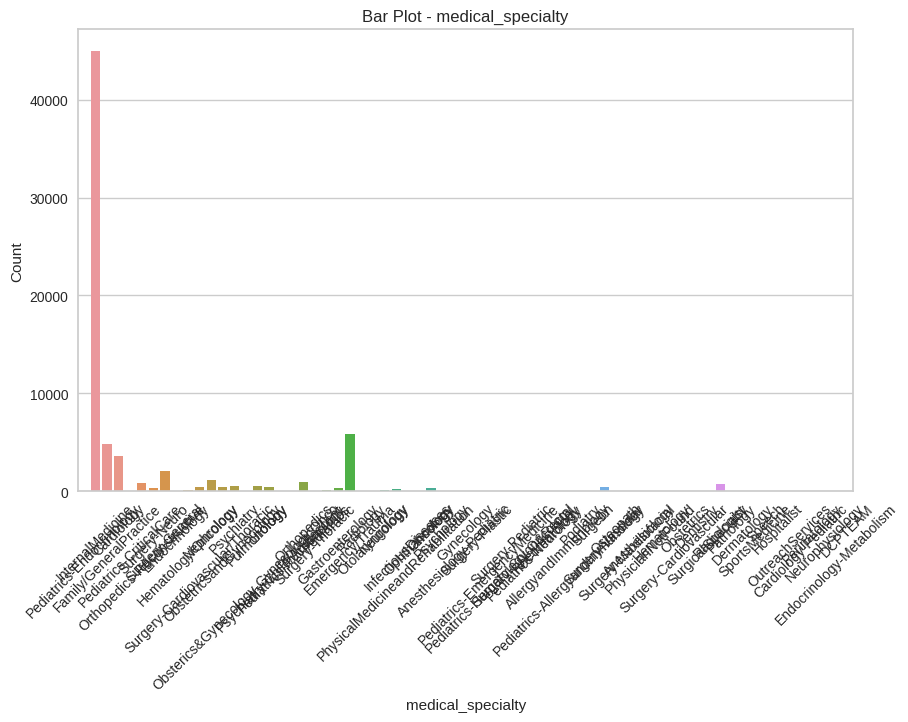

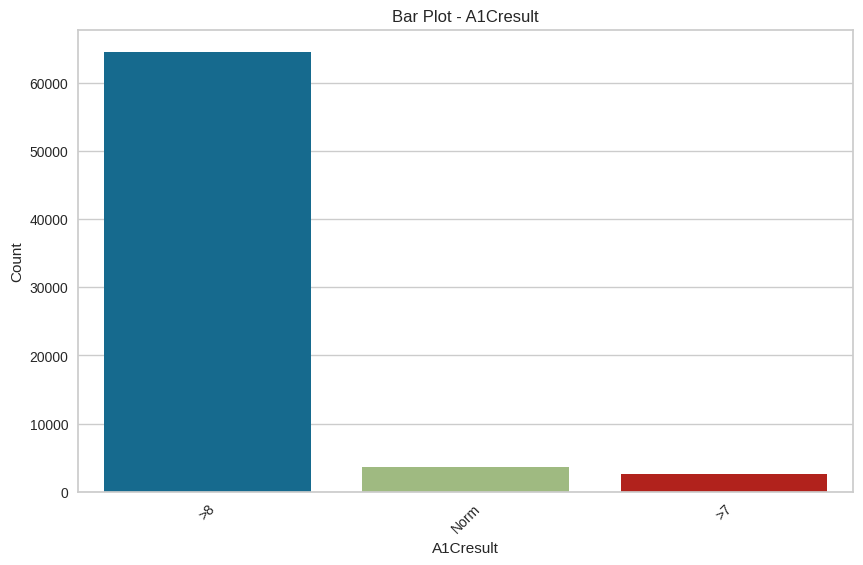

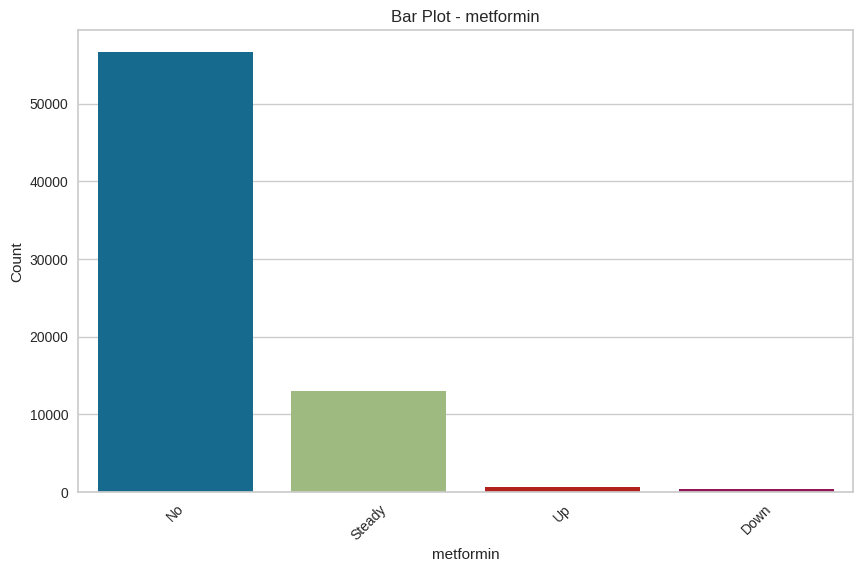

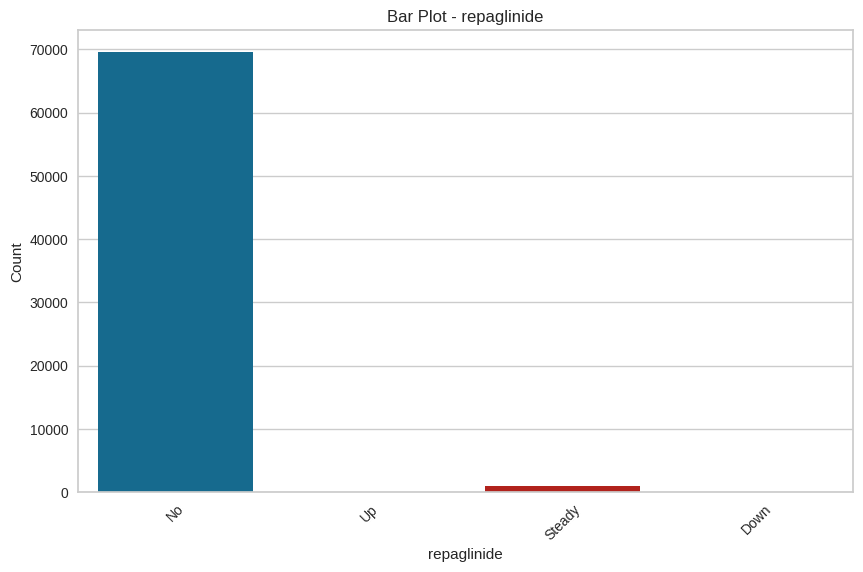

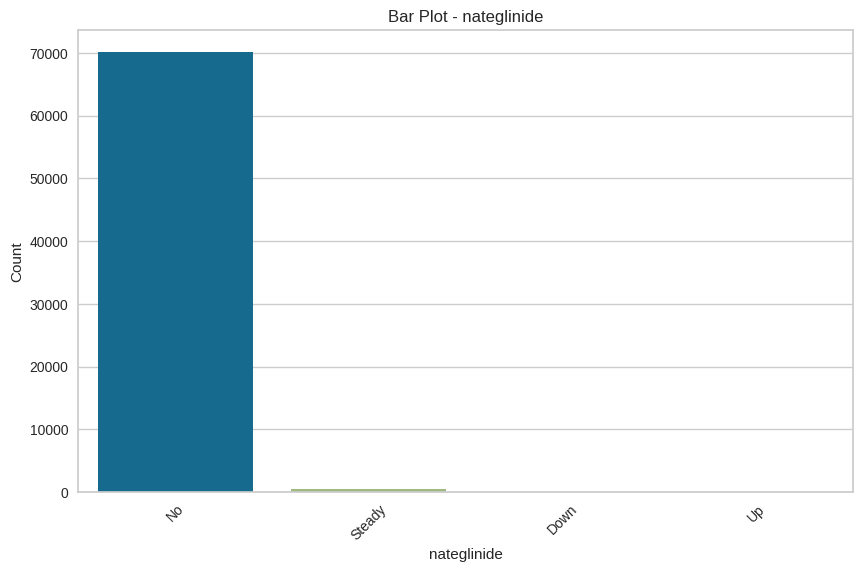

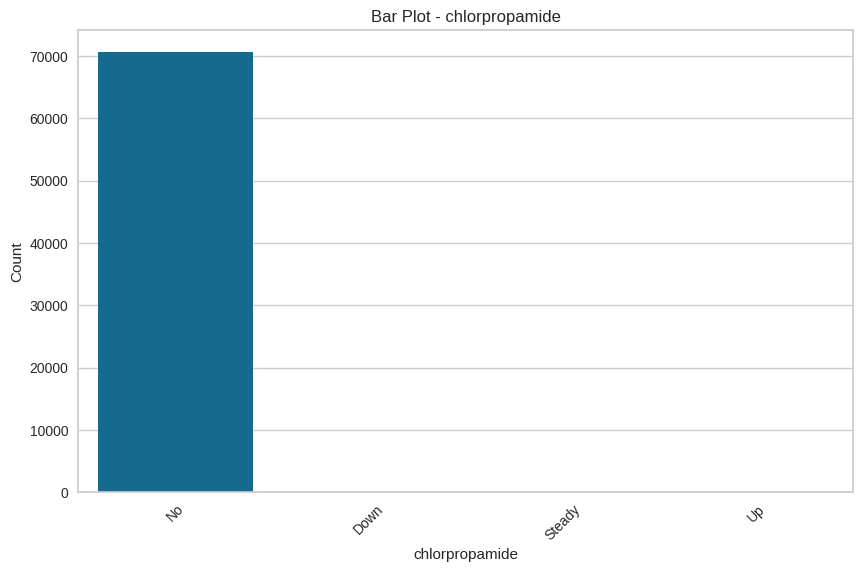

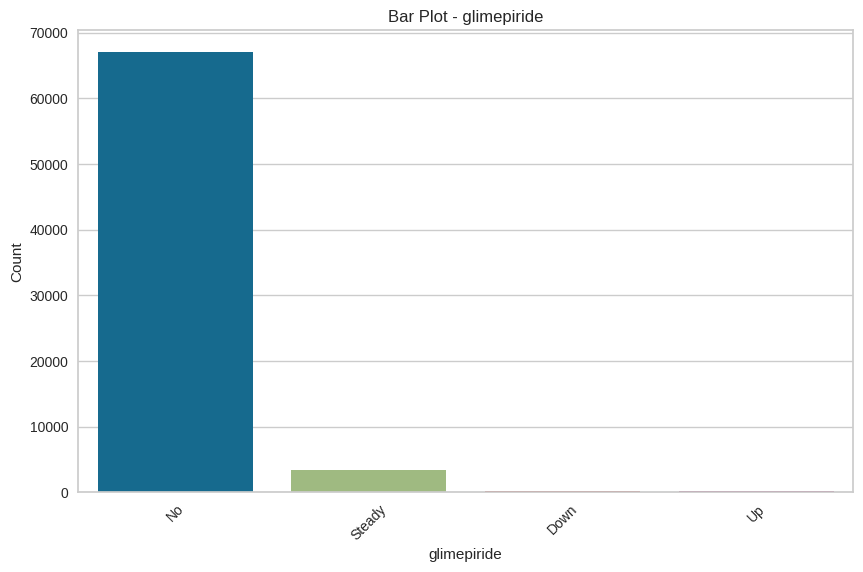

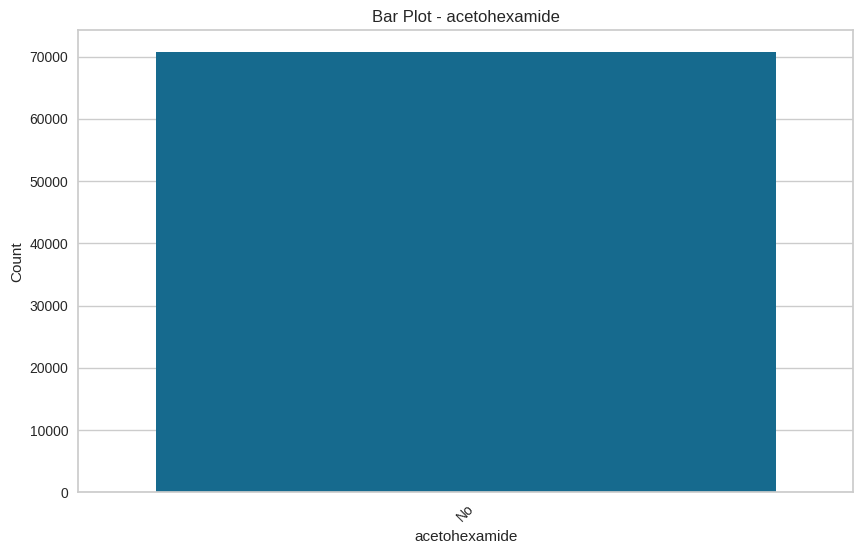

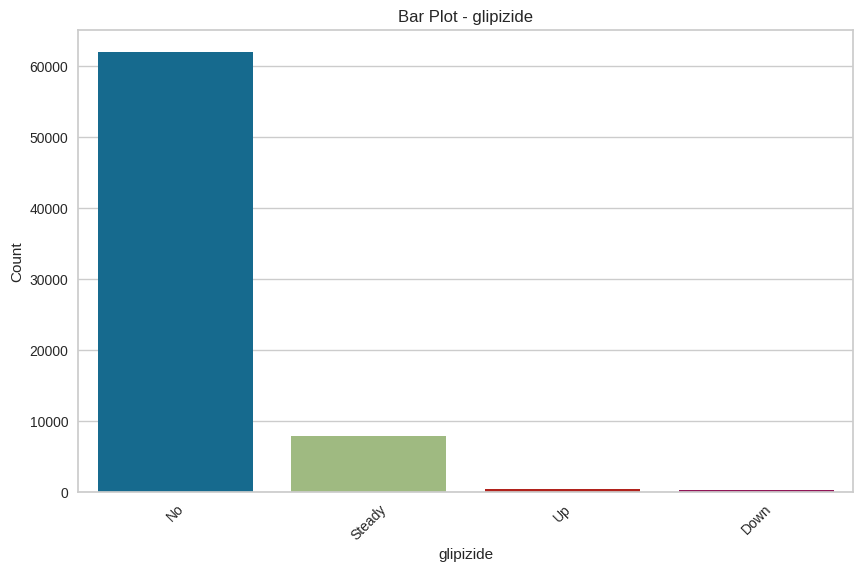

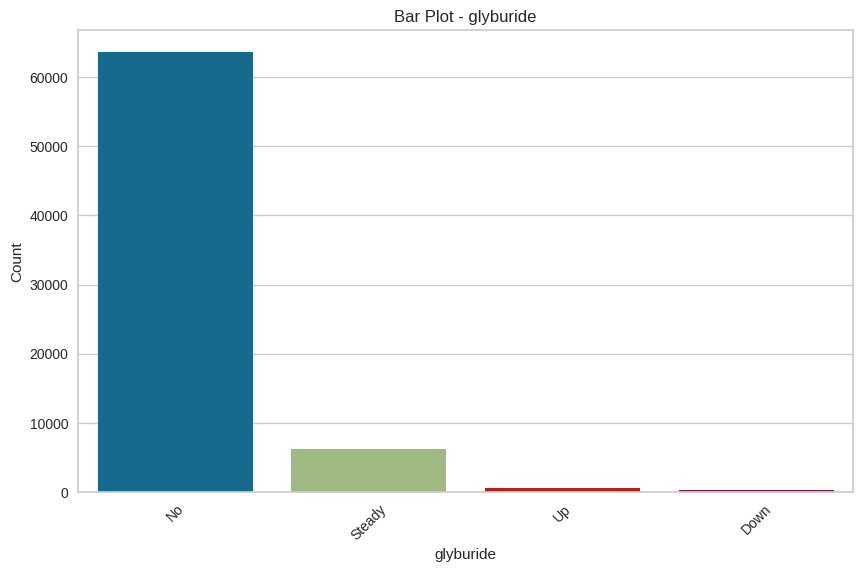

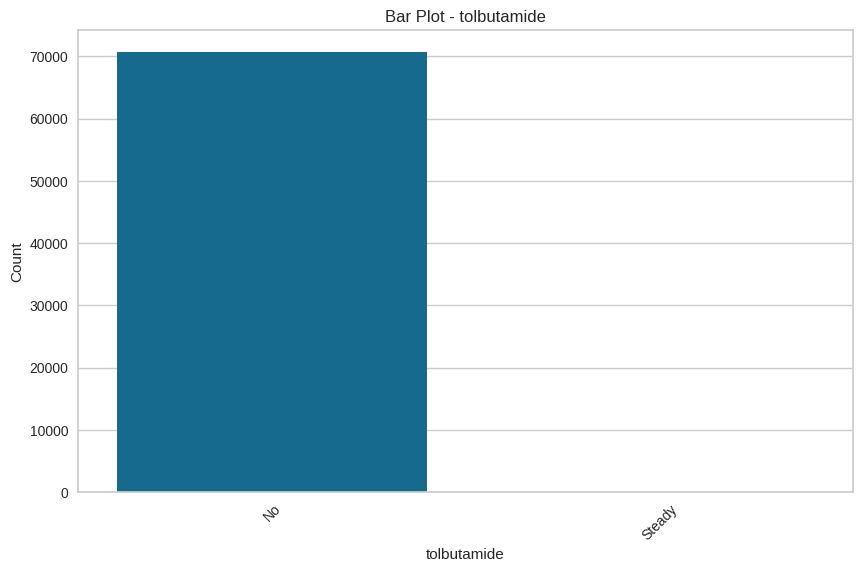

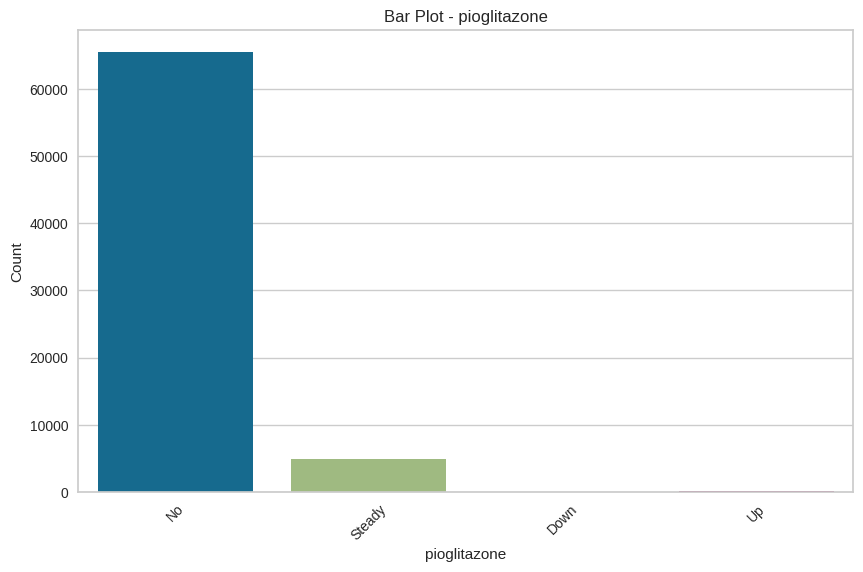

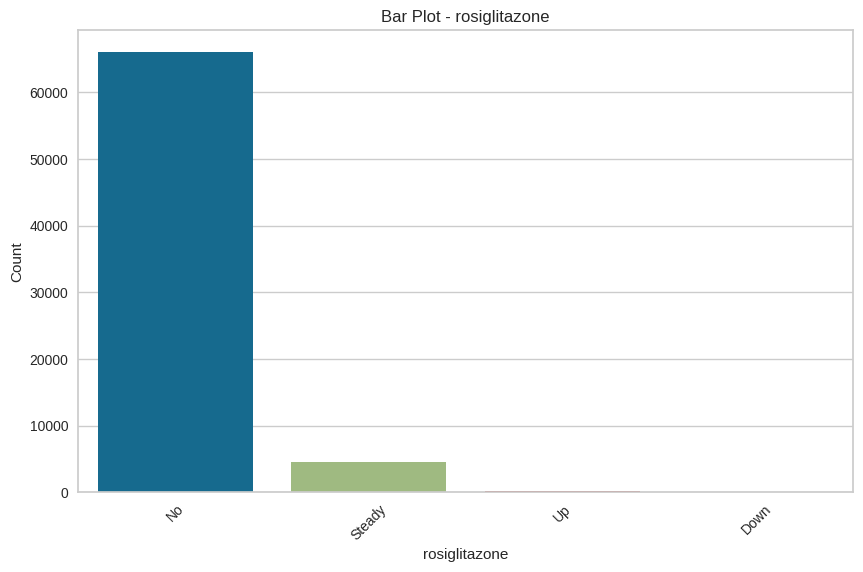

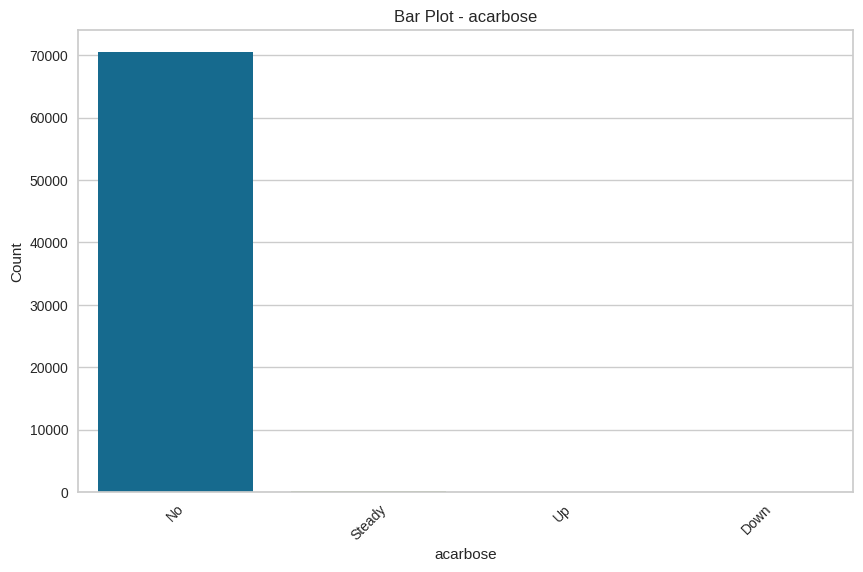

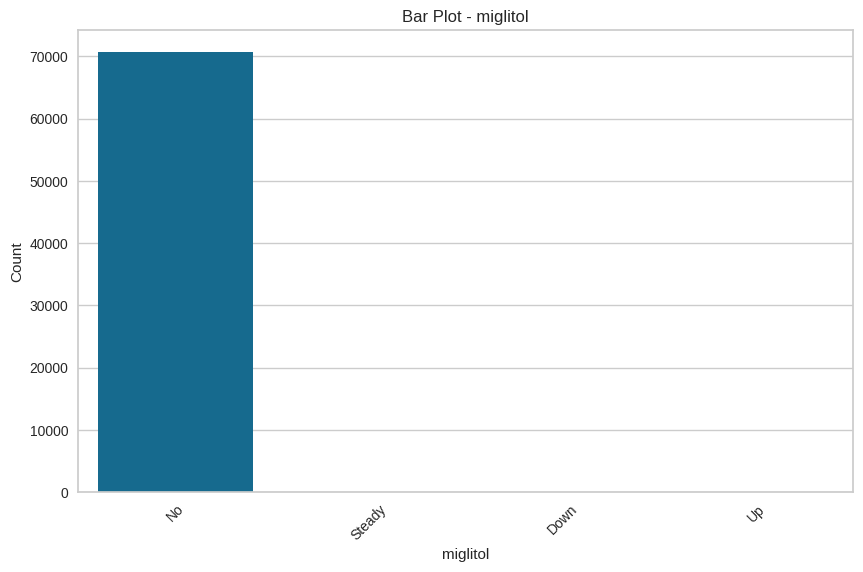

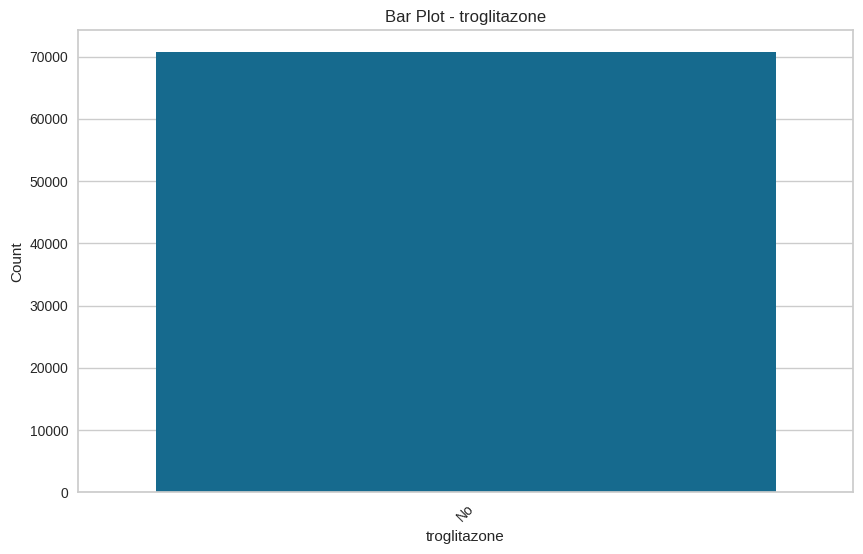

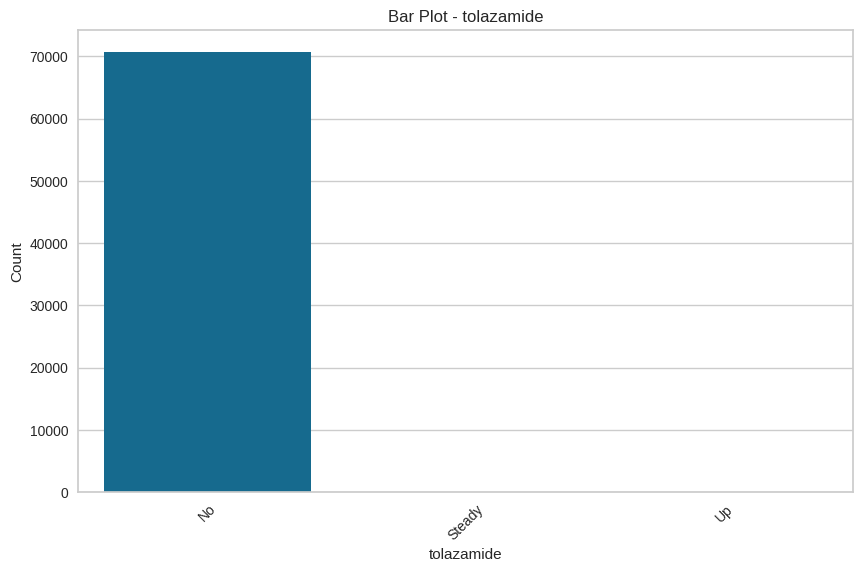

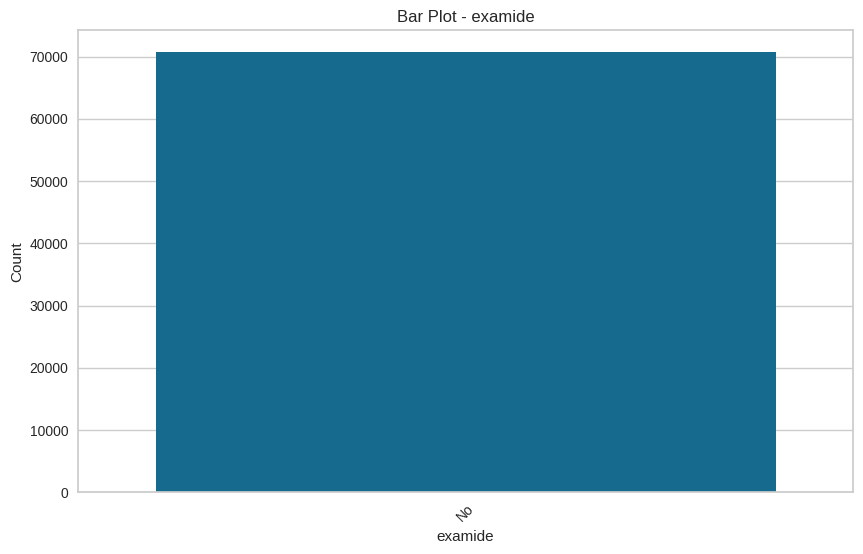

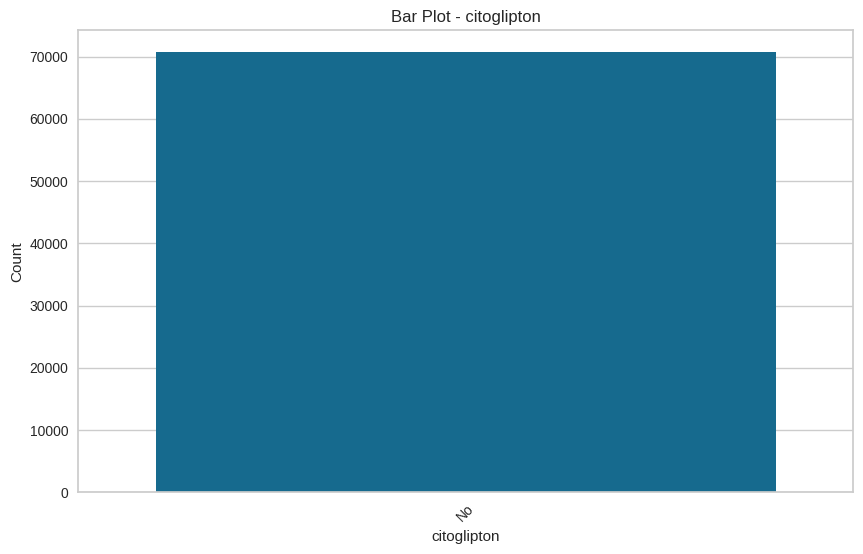

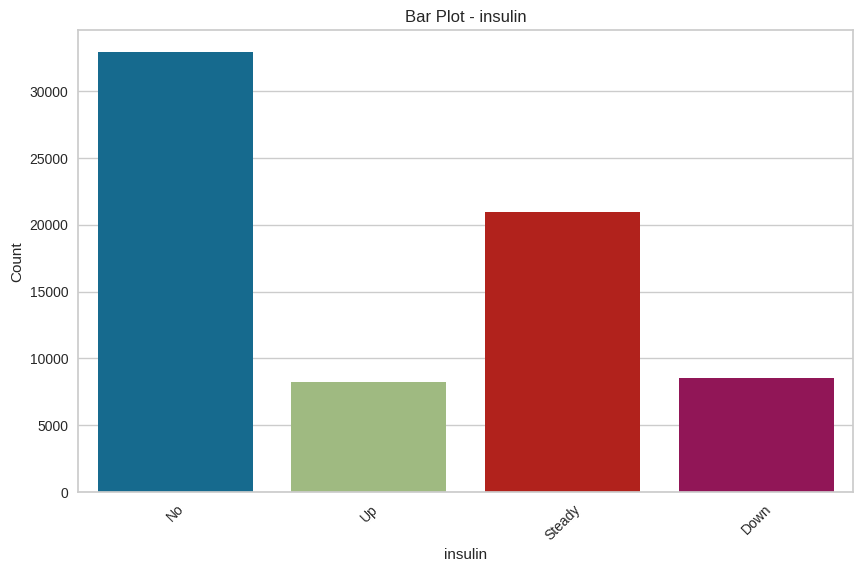

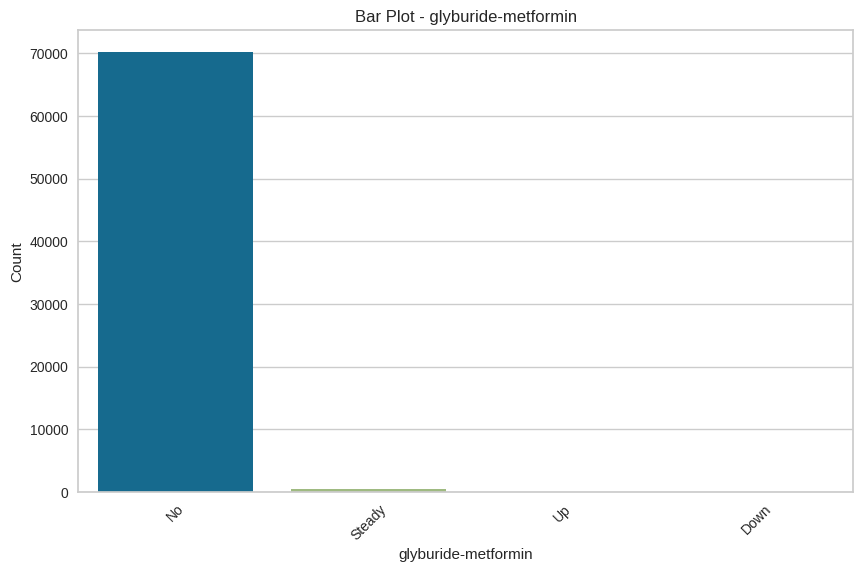

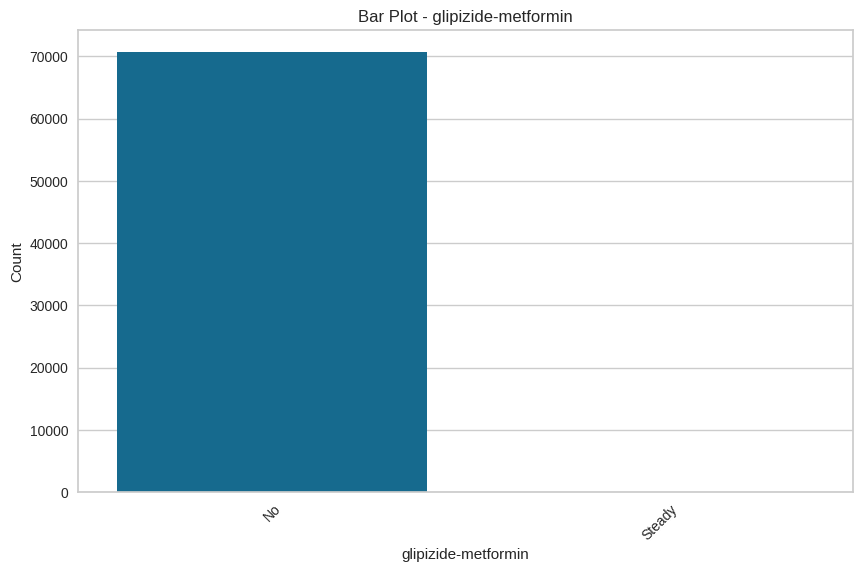

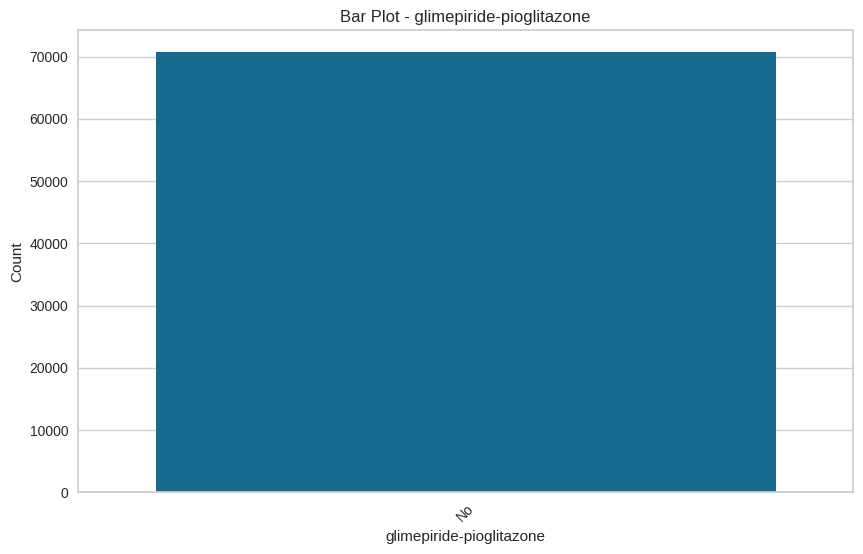

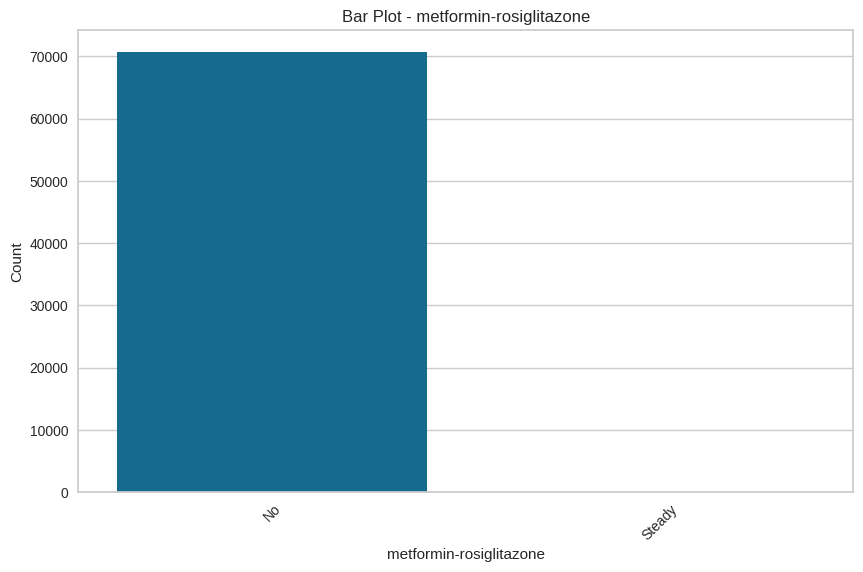

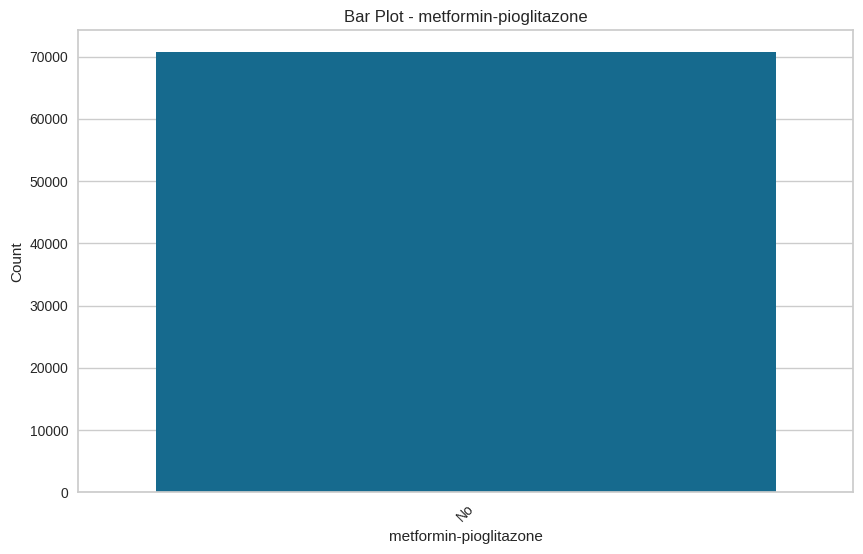

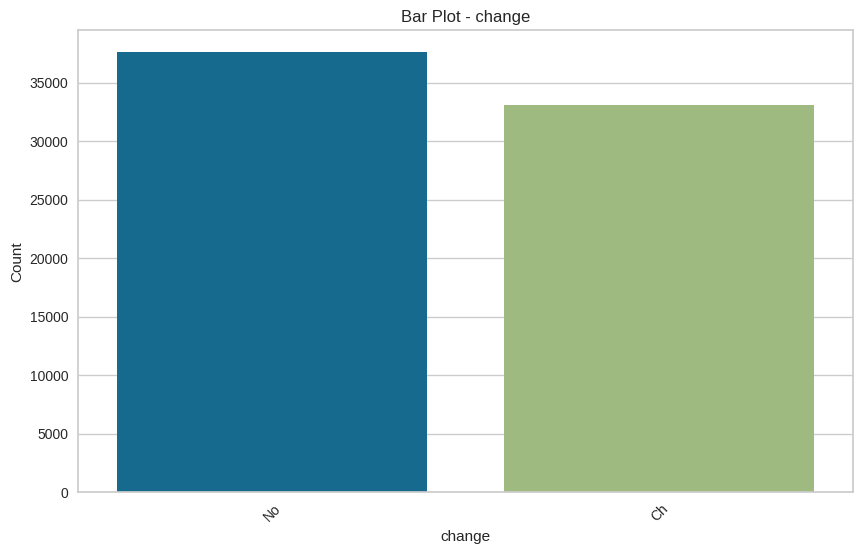

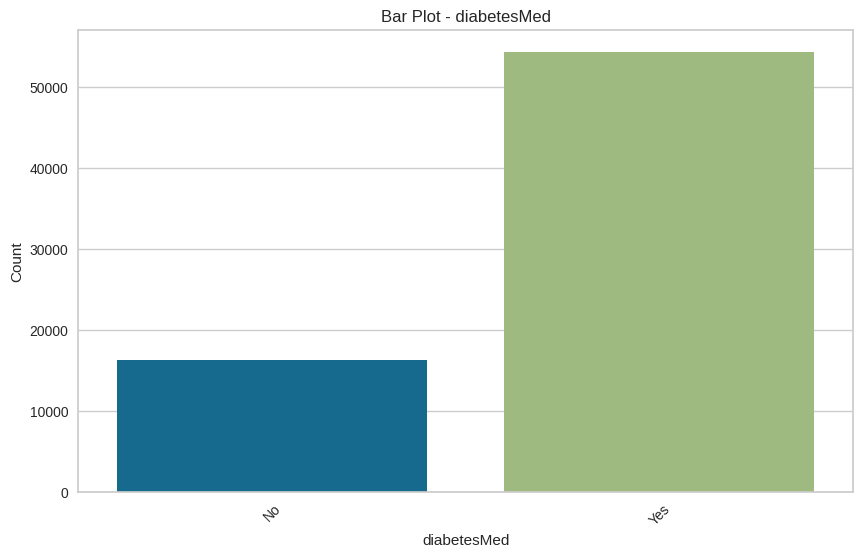

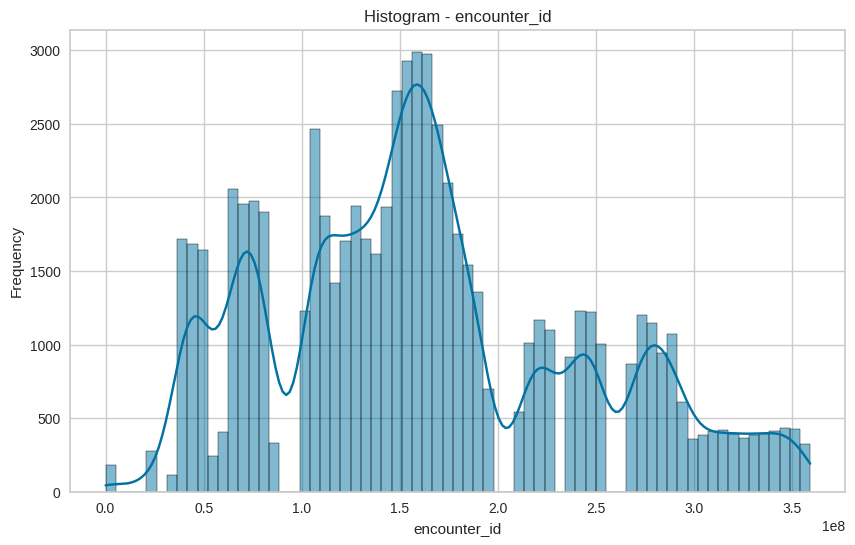

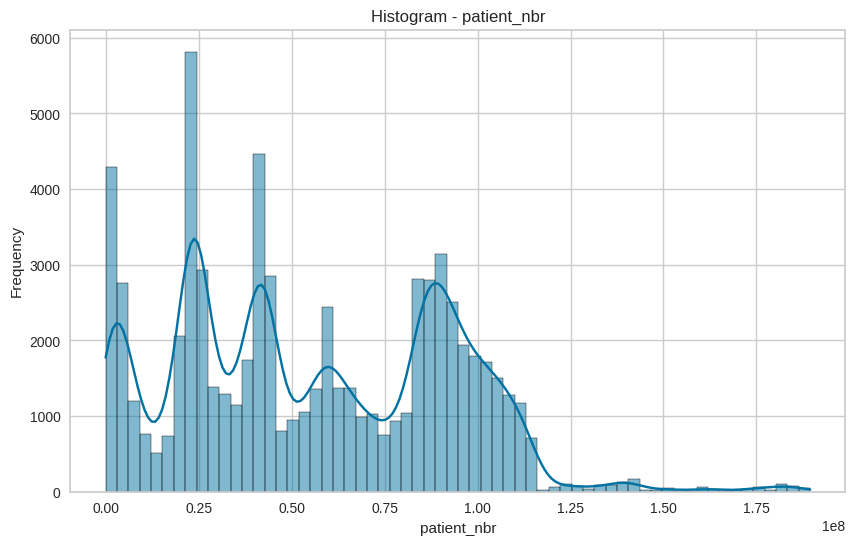

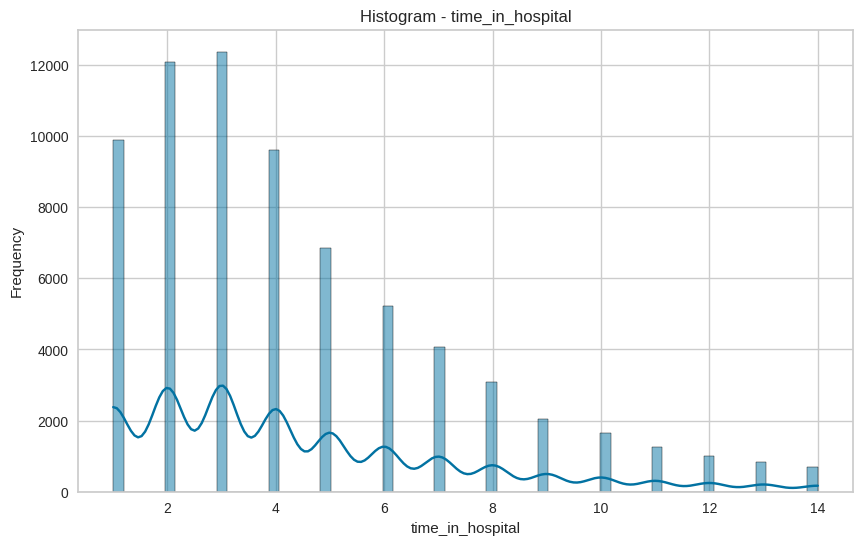

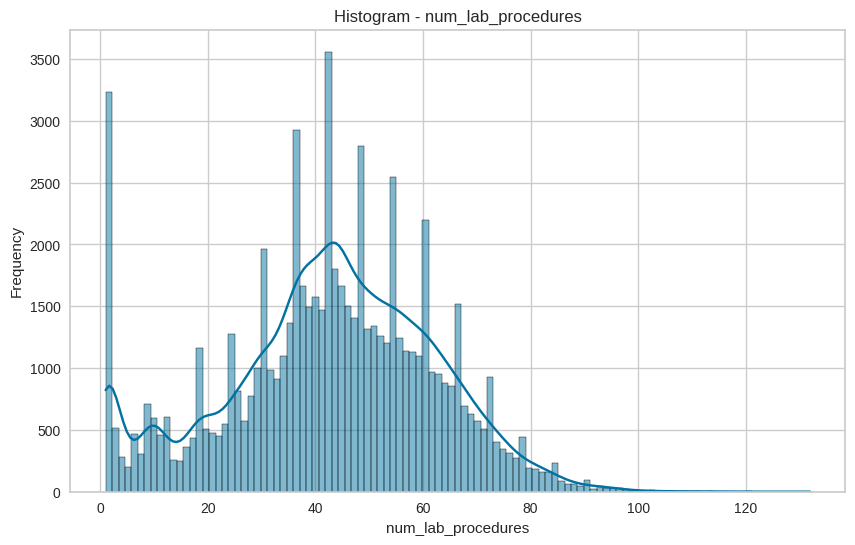

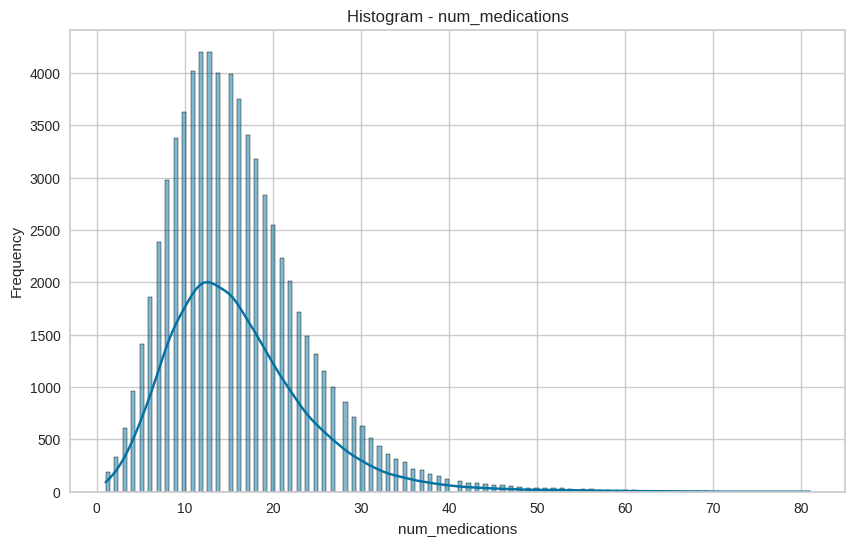

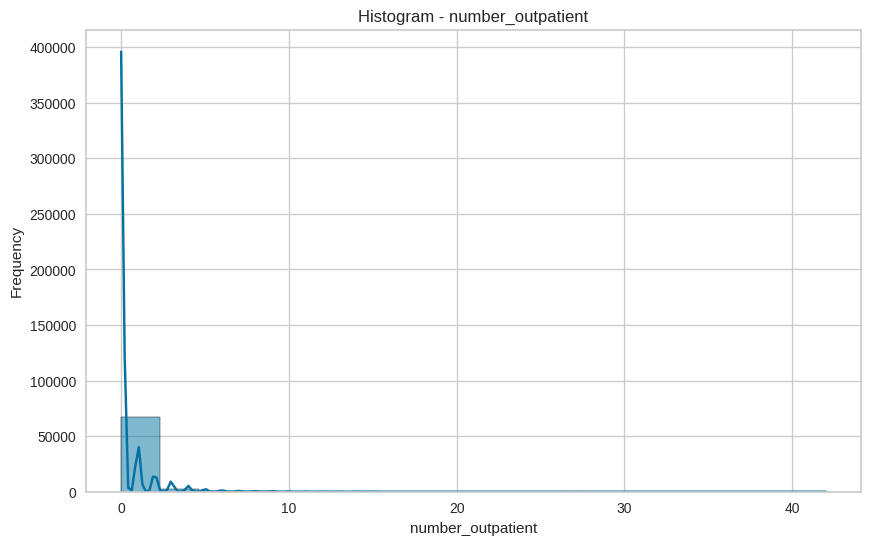

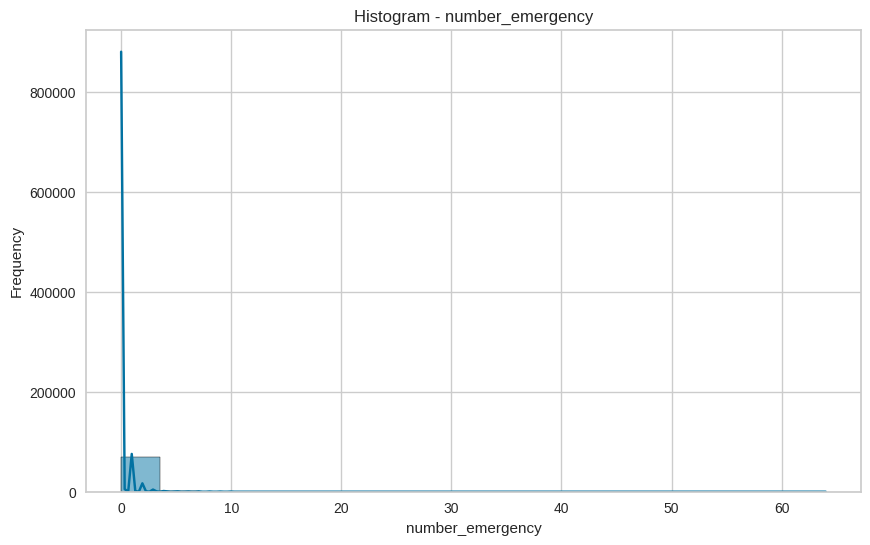

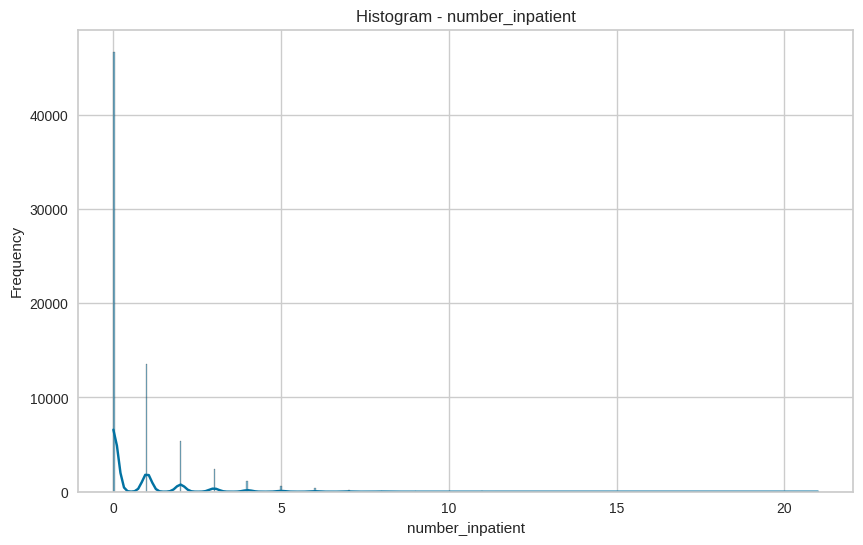

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore characteristics and their values using diagrams


# Detect numerical and categorical features
numerical_cols = df_before_encoding.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_before_encoding.select_dtypes(include=['object']).columns

# 1. Bar plot for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_before_encoding, x=col)
    plt.title(f"Bar Plot - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 2. Histogram for numerical variables

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_before_encoding, x=col, kde=True)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

## **3. Using the elbow method to find the optimal number of clusters (k)**

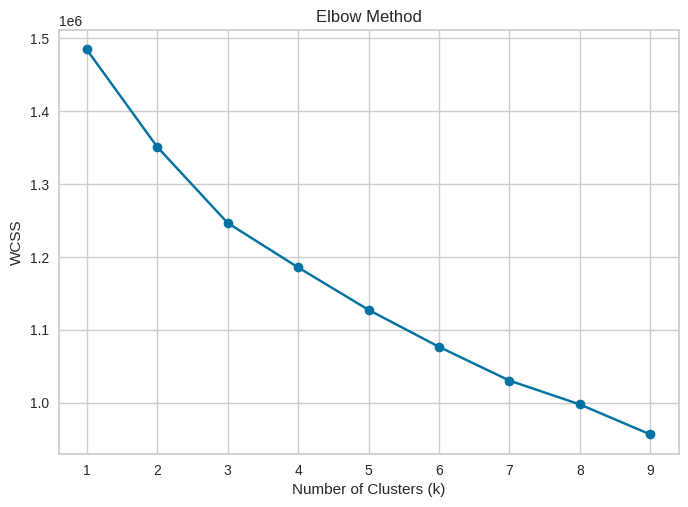

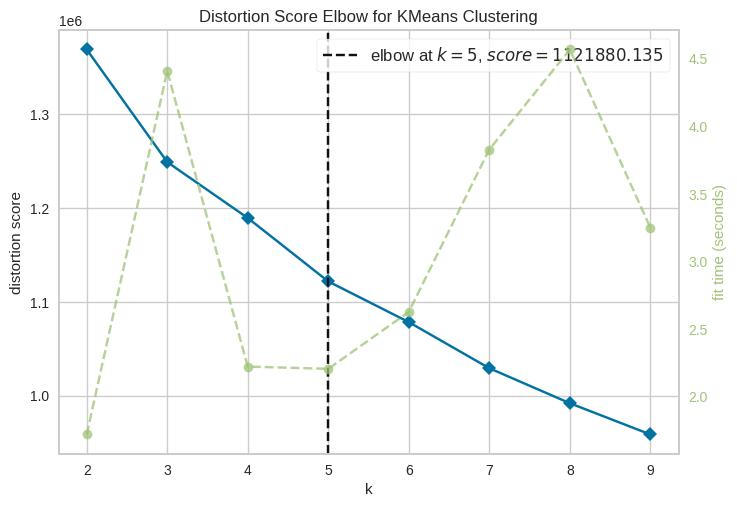

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

selected_features = ['gender','race','age','medical_specialty','A1Cresult','metformin','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone','insulin','glyburide','change','diabetesMed','time_in_hospital','num_lab_procedures','num_medications','number_outpatient','number_inpatient','number_emergency']

df_selected = df[selected_features]

# Apply the elbow method
WCSS = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    WCSS.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, WCSS, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#Using the KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 10))
visu.fit(df_selected)
visu.show()

In [ ]:
df

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,-2.029877,-1.316267,0.408655,-0.927816,-3.849674,-1.136153,-0.020975,1.412343,-0.079469,-1.842179,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,-1.827646
1,-2.056796,-0.005734,0.408655,-0.927816,-3.219613,-0.465449,-0.020975,-0.131028,0.833428,0.230890,...,0.0,0.0,1.878022,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
2,-2.057868,0.835167,-1.915122,-0.927816,-2.589552,-0.800801,-0.020975,-0.131028,-1.600964,-0.378836,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,0.547152
3,-2.052356,0.735496,0.408655,1.077677,-1.959491,-0.800801,-0.020975,-0.131028,0.072681,-0.013000,...,0.0,0.0,1.878022,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
4,-2.058471,-0.368149,0.408655,1.077677,-1.329430,-1.136153,-0.020975,-0.131028,0.427696,-0.988562,...,0.0,0.0,0.697764,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70694,2.480316,0.373513,0.408655,-0.927816,1.190814,1.211312,-0.020975,-0.131028,-0.637351,-1.476344,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,-1.827646
70695,2.480413,2.282231,0.408655,1.077677,-0.069308,-1.136153,0.327458,-0.699639,-2.006696,0.474781,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,0.938106,0.547152
70696,2.480445,0.971537,-1.915122,-0.927816,1.190814,-0.800801,-0.020975,-0.943329,0.782712,-0.622727,...,0.0,0.0,-0.482493,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152
70697,2.480446,1.012898,0.408655,1.077677,-0.699369,-0.130097,2.418055,-0.943329,0.934861,0.962562,...,0.0,0.0,0.697764,-0.08505,-0.013561,0.0,-0.003761,0.0,-1.065978,0.547152


## **4.Dataset clustering using Kmeans algorithm**

In [ ]:
data = df.copy()

In [ ]:
# Apply KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5).fit(df_selected)
clusters = kmeans.labels_

pd.DataFrame({"Customers": data.index, "Clusters": clusters})
data["Cluster"] = clusters

print(clusters)

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

[1 0 3 ... 3 0 4]
3    24996
0    19143
1    16286
4     6772
2     3502
Name: Cluster, dtype: int64


## **5. Cluster Vizualization with different colors**

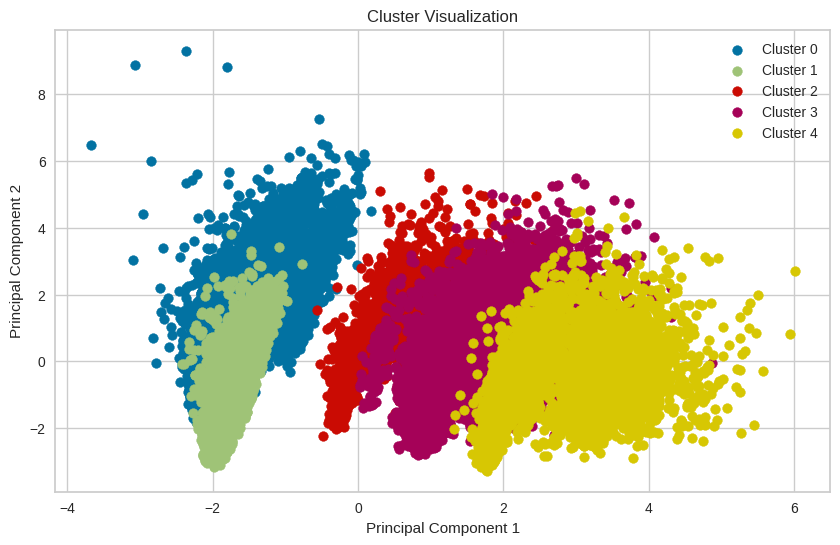

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))

# Assign cluster labels to the data
cluster_labels = kmeans.labels_

for cluster in range(5):
    cluster_data = pca_features[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## **6. Evaluation of clustering by Silhouette coefficient and inertia metrics**

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using Silhouette coefficient
silhouette_score_avg = silhouette_score(df_selected, cluster_labels)
print(f"Silhouette coefficient: {silhouette_score_avg}")

Silhouette coefficient: 0.10693007477441772


In [ ]:
# Evaluate clustering using another criterion (e.g., Inertia)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 1128707.7419947074


## **8.  Cluster dataset using Hierarchical algorithms**

### **8.1. Cluster dataset using scikit-Learn**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(df_selected)

### **8.2. Cluster dataset using scipy**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(df_selected, method='ward')

plt.figure(figsize=(15, 12))

dendrogram(
    Z,
    orientation='right',
    labels=df.index.tolist(),
    show_leaf_counts=False
)

plt.show()

## **9.Reduce dimensions to k features by PCA method**

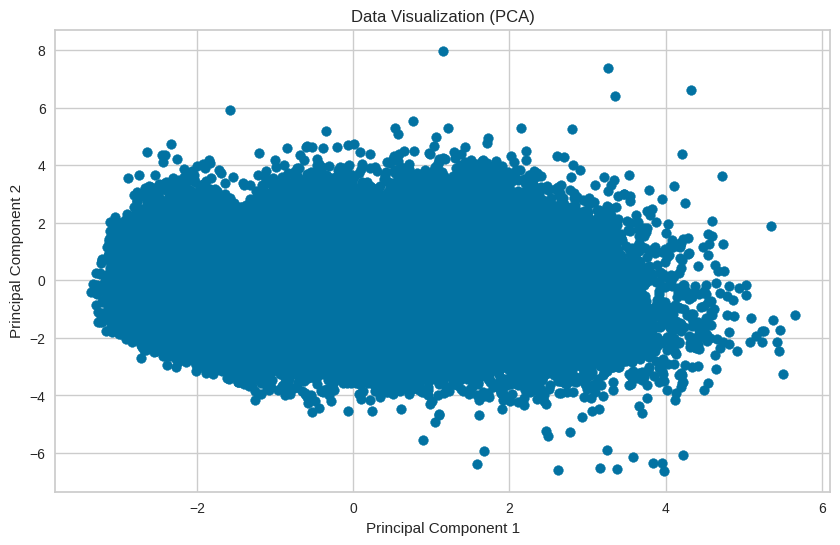

In [ ]:
# Perform PCA dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 dimensions
reduced_features = pca.fit_transform(df)

# Plot the data in the Euclidean space
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1])
plt.title('Data Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()